# Análise exploratória de dados qualitativos

In [2]:
# Importanto as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# estabelecendo o caminho onde o dataset está armazenado
caminho = '../data/raw/archive/xAPI-Edu-Data.csv'

# especificando as colunas de interesse para este estudo
coluna = ['gender', 'StageID', 'Class']

In [19]:
# lendo o arquivo csv somente com a coluna 'raisedhands'
df = pd.read_csv(caminho, usecols=coluna)

# exibindo os cincos primeiros registros da tabela
df.head(5)

,gender,StageID,Class
0,M,lowerlevel,M
1,M,lowerlevel,M
2,M,lowerlevel,L
3,M,lowerlevel,L
4,M,lowerlevel,M


In [20]:
# exibindo algunas informações sobre o nosso conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   gender   480 non-null    object
 1   StageID  480 non-null    object
 2   Class    480 non-null    object
dtypes: object(3)
memory usage: 11.4+ KB


In [21]:
frequencia_absoluta = df.groupby('StageID')['gender'].value_counts()

frequencia_relativa = df.groupby('StageID')['gender'].value_counts(normalize=True)

tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': frequencia_absoluta,
    'Frequência Relativa': frequencia_relativa
})

tabela_frequencia

Frequência Absoluta  Frequência Relativa
StageID      gender                                          
HighSchool   M                        18             0.545455
             F                        15             0.454545
MiddleSchool M                       166             0.669355
             F                        82             0.330645
lowerlevel   M                       121             0.608040
             F                        78             0.391960

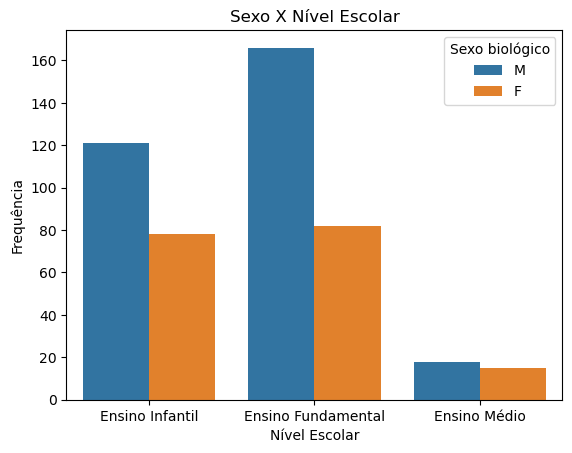

In [22]:
# Alterar os identificadores dos níveis escolares
df['StageID'] = df['StageID'].replace(
    {'lowerlevel': 'Ensino Infantil', 
     'MiddleSchool': 'Ensino Fundamental', 
     'HighSchool': 'Ensino Médio'})

# Criar um gráfico de barras
sns.countplot(x='StageID', hue='gender', data=df)

# Adicionar título e rótulos aos eixos
plt.title('Sexo X Nível Escolar')
plt.xlabel('Nível Escolar')
plt.ylabel('Frequência')

# Adicionar uma legenda
plt.legend(title='Sexo biológico')

# Mostrar o gráfico
plt.show()

In [23]:
#exibindo medidas de tendência central
df.describe()

,gender,StageID,Class
count,480,480,480
unique,2,3,3
top,M,Ensino Fundamental,M
freq,305,248,211


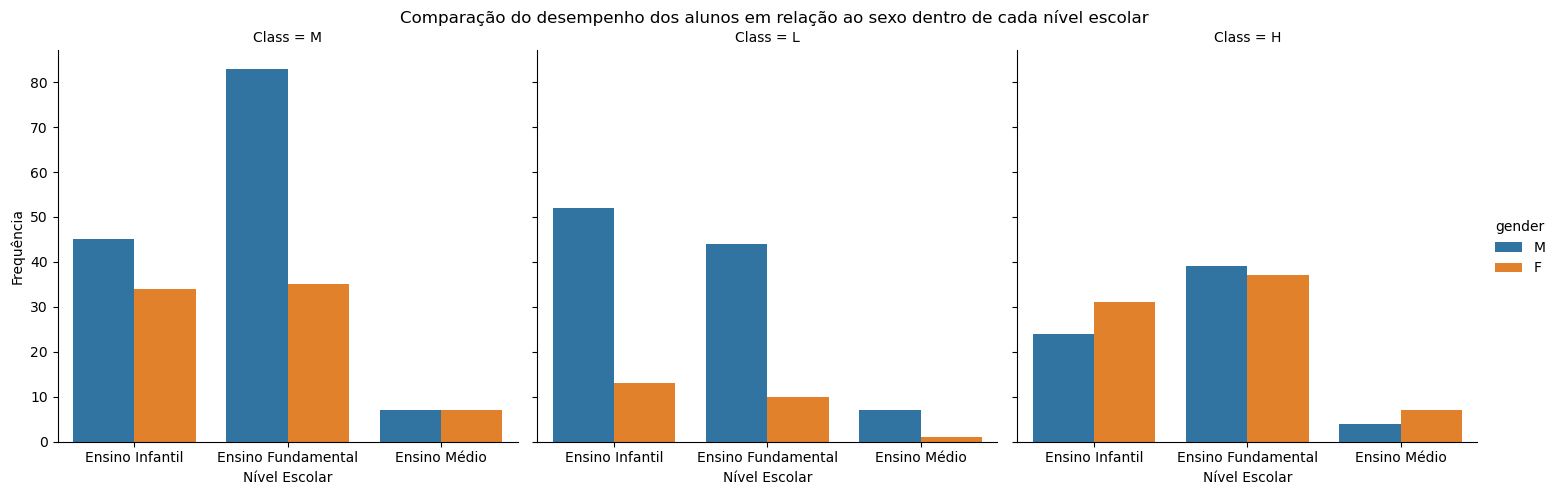

In [31]:
# Criar um gráfico categórico
g = sns.catplot(x='StageID', hue='gender', col='Class', data=df, kind='count')

# Adicionar título e rótulos aos eixos
g.fig.subplots_adjust(top=0.9) # ajustar para o título não sobrepor os gráficos
g.fig.suptitle('Comparação do desempenho dos alunos em relação ao sexo dentro de cada nível escolar')
g.set_axis_labels('Nível Escolar', 'Frequência')

# Mostrar o gráfico
plt.show()